In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn import preprocessing
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD, RMSprop, Adadelta, Adam
import matplotlib.pyplot as plt
from keras import regularizers 
import sklearn
from sklearn import svm
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import auto_regression as ar
import regular_regression as rr
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor


Using TensorFlow backend.


In [2]:
#train
#test
#load data
path = 'C:/Users/mys12/Desktop/northeastern/summer2018/data_Robust_Fingerprinting-master/DISTRIBUTED_OPENSOURCE/FINGERPRINTING_DB'

test_rss = pd.read_csv(path + '/Training_rss_21Aug17.csv', header = 0)
test_coord = pd.read_csv(path + '/Training_coordinates_21Aug17.csv', header = 0)
test_rss = test_rss.replace(100, 0)

train_rss = pd.read_csv(path + '/Test_rss_21Aug17.csv', header = 0)
train_coord = pd.read_csv(path + '/Test_coordinates_21Aug17.csv', header = 0)
train_rss = train_rss.replace(100, 0)

In [3]:
train = pd.concat([train_rss, train_coord], axis=1, ignore_index=True)
test = pd.concat([test_rss, test_coord], axis=1, ignore_index=True)
train = np.asarray(train)
test = np.asarray(test)

# first floor
train1 = train[train[:,-1]==0.0]
normalizer = preprocessing.Normalizer().fit(train1[:,:-3])
train1_r=normalizer.transform(train1[:,:-3])
train1_c=train1[:,-3:-1]
print(train1_r.shape[1])

test1 = test[test[:,-1]==0.0]
test1_r=normalizer.transform(test1[:,:-3])
test1_c=test1[:,-3:-1]

992


In [4]:
def predata(rss, locations):
    # the origin of the room
    origin = np.amin(locations,axis=0)
    #size of the room
    room_size = np.amax(locations, axis=0)-origin
    # position respect to origin
    train_Yy = locations - origin
    train_Xx = np.asarray(rss, dtype=np.float64)
    return train_Xx, train_Yy

In [5]:
# def train_val(rss, locations):
#     train_Xx, train_Yy = predata(rss, locations)
#     train_x, val_x, train_y, val_y = train_test_split(train_Xx, train_Yy, test_size=0.2)
#     return train_x, val_x, train_y, val_y

In [6]:
def accuracy(predictions, labels):
    error = np.sqrt(np.sum((predictions - labels)**2, 1))
    return error, np.mean(error)

In [7]:
trainX, trainY = predata(train1_r, train1_c)
testX, testY = predata(test1_r, test1_c)

In [23]:
clf1=rr.train_model
clf2=ar.regression

neigh = KNeighborsRegressor(n_neighbors=4)
clf3 = neigh.fit

clf4 = rr.train_model2


dr = DecisionTreeRegressor(max_depth = 9)
clf5 = dr.fit

clfs = [clf1,clf2,clf3,clf4,clf5]


In [24]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=2018)


In [25]:
def reshaped(predict):
    size = predict.shape[0]
    j = predict.reshape((2*size, 1))
    return j

In [26]:
def get_oof(clf, X_train, y_train, X_test):
#     X_train = reshaped(X_train)
#     y_train = reshaped(y_train)
#     X_test = reshaped(X_test)

    blend_train = np.zeros((y_train.shape[0],2))
    blend_test = np.zeros((X_test.shape[0],2))
    blend_test_skf = np.zeros((X_test.shape[0],2,5)) 
    
    for i, (train_index, test_index) in enumerate(list(kf.split(X_train))):
        print("Fold", i)   

        kf_X_train = X_train[train_index]
        kf_y_train = y_train[train_index]
        kf_X_test = X_train[test_index]
        kf_y_test = y_train[test_index]
        
        model = clf(kf_X_train,kf_y_train)
        
        blend_train[test_index]=model.predict(kf_X_test)  # 992*2
        
        blend_test_skf[:,:,i] = model.predict(X_test)   # 1*292*2
    
    blend_test[:,:]=blend_test_skf.mean(axis=2)
    return blend_train, blend_test

In [51]:
blend_train3, blend_test3 = get_oof(clf3, trainX, trainY, testX)
e3, e3_mean = accuracy(blend_test3, testY)
print(e3_mean)

Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
8.50018640807


In [28]:
blend_test3

array([[ 103.203   ,   37.66458 ],
       [  82.40365 ,   27.53373 ],
       [ 114.986   ,   37.99638 ],
       [ 132.448   ,   28.57548 ],
       [  55.4249  ,   15.64583 ],
       [  94.796   ,   53.47178 ],
       [  43.45965 ,   19.14968 ],
       [ 105.108   ,   24.80828 ],
       [  53.98    ,   16.07823 ],
       [  66.5732  ,   31.89973 ],
       [  77.25165 ,   22.00058 ],
       [  69.73575 ,   24.38083 ],
       [  67.9996  ,   23.37908 ],
       [  53.8442  ,   25.46698 ],
       [ 132.      ,   38.07608 ],
       [ 119.89    ,   69.55053 ],
       [ 133.158   ,   46.06573 ],
       [  95.0293  ,   35.93773 ],
       [ 139.5045  ,   28.26263 ],
       [  23.47205 ,   24.09053 ],
       [  59.3365  ,   38.46588 ],
       [  80.73075 ,   18.97433 ],
       [ 107.9495  ,   18.32258 ],
       [  93.3715  ,   62.86078 ],
       [ 121.742   ,   66.81118 ],
       [  50.91115 ,   24.21203 ],
       [  53.66365 ,   16.965875],
       [  99.4035  ,   37.05533 ],
       [  55.6733  ,

In [39]:
blend_train1, blend_test1 = get_oof(clf1, trainX, trainY, testX)
e1, e1_mean = accuracy(blend_test1, testY)
print("el_mean: ", e1_mean)
blend_train2, blend_test2 = get_oof(clf2, trainX, trainY, testX)
e2, e2_mean = accuracy(blend_test2, testY)
print("e2_mean: ", e2_mean)
blend_train4, blend_test4 = get_oof(clf4, trainX, trainY, testX)
e4, e4_mean = accuracy(blend_test4, testY)
print("e4_mean", e4_mean)
blend_train5, blend_test5 = get_oof(clf5, trainX, trainY, testX)
e5, e5_mean = accuracy(blend_test5, testY)
print("e5_mean: ", e5_mean)

Fold 0
Train on 808 samples, validate on 203 samples
Epoch 1/100
808/808 [==============================] - 1s - loss: 4764.9415 - val_loss: 4734.2809
Epoch 2/100
808/808 [==============================] - 0s - loss: 4602.8617 - val_loss: 4452.7651
Epoch 3/100
808/808 [==============================] - 0s - loss: 4130.4952 - val_loss: 3746.9824
Epoch 4/100
808/808 [==============================] - 0s - loss: 3156.5258 - val_loss: 2539.7597
Epoch 5/100
808/808 [==============================] - 0s - loss: 1870.3809 - val_loss: 1395.2769
Epoch 6/100
808/808 [==============================] - 0s - loss: 1107.0069 - val_loss: 943.0773
Epoch 7/100
808/808 [==============================] - 0s - loss: 799.0540 - val_loss: 717.6469
Epoch 8/100
808/808 [==============================] - 0s - loss: 613.6683 - val_loss: 577.2179
Epoch 9/100
808/808 [==============================] - 0s - loss: 505.1938 - val_loss: 475.1050
Epoch 10/100
808/808 [==============================] - 0s - loss: 431.0

808/808 [==============================] - 0s - loss: 107.3739 - val_loss: 89.5250
Epoch 86/100
808/808 [==============================] - 0s - loss: 108.6804 - val_loss: 88.5985
Epoch 87/100
808/808 [==============================] - 0s - loss: 105.8598 - val_loss: 88.7133
Epoch 88/100
808/808 [==============================] - 0s - loss: 105.6127 - val_loss: 88.9284
Epoch 89/100
808/808 [==============================] - 0s - loss: 104.8442 - val_loss: 86.7888
Epoch 90/100
808/808 [==============================] - 0s - loss: 108.9796 - val_loss: 86.7821
Epoch 91/100
808/808 [==============================] - 0s - loss: 106.9363 - val_loss: 86.4967
Epoch 92/100
808/808 [==============================] - 0s - loss: 108.6865 - val_loss: 86.9302
Epoch 93/100
808/808 [==============================] - 0s - loss: 109.5251 - val_loss: 85.5545
Epoch 94/100
808/808 [==============================] - 0s - loss: 110.6464 - val_loss: 85.4082
Epoch 95/100
808/808 [==============================]

808/808 [==============================] - 0s - loss: 127.0397 - val_loss: 94.3115
Epoch 54/100
808/808 [==============================] - 0s - loss: 125.0222 - val_loss: 94.3000
Epoch 55/100
808/808 [==============================] - 0s - loss: 128.4769 - val_loss: 94.7719
Epoch 56/100
808/808 [==============================] - 0s - loss: 130.6773 - val_loss: 94.1442
Epoch 57/100
808/808 [==============================] - 0s - loss: 130.8733 - val_loss: 92.7600
Epoch 58/100
808/808 [==============================] - 0s - loss: 125.1742 - val_loss: 91.8861
Epoch 59/100
808/808 [==============================] - 0s - loss: 124.5953 - val_loss: 91.8721
Epoch 60/100
808/808 [==============================] - 0s - loss: 119.4474 - val_loss: 90.9294
Epoch 61/100
808/808 [==============================] - 0s - loss: 120.1203 - val_loss: 89.7741
Epoch 62/100
808/808 [==============================] - 0s - loss: 126.2983 - val_loss: 91.4841
Epoch 63/100
808/808 [==============================]

809/809 [==============================] - 0s - loss: 237.2151 - val_loss: 183.2243
Epoch 22/100
809/809 [==============================] - 0s - loss: 233.2119 - val_loss: 171.7347
Epoch 23/100
809/809 [==============================] - 0s - loss: 214.0835 - val_loss: 162.6221
Epoch 24/100
809/809 [==============================] - 0s - loss: 205.0510 - val_loss: 155.1267
Epoch 25/100
809/809 [==============================] - 0s - loss: 197.3416 - val_loss: 146.4802
Epoch 26/100
809/809 [==============================] - 0s - loss: 192.8422 - val_loss: 139.5160
Epoch 27/100
809/809 [==============================] - 0s - loss: 191.1672 - val_loss: 134.4103
Epoch 28/100
809/809 [==============================] - 0s - loss: 183.0720 - val_loss: 129.8396
Epoch 29/100
809/809 [==============================] - 0s - loss: 164.1953 - val_loss: 126.7311
Epoch 30/100
809/809 [==============================] - 0s - loss: 178.2335 - val_loss: 124.6085
Epoch 31/100
809/809 [=====================

C:\software\WinPython-64bit-3.6.2.0Qt5\notebooks\indoor position\auto_regression.py:24: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, input_dim=992, activation="relu", use_bias=True)`
  model.add(Dense(512, input_dim=input_size, activation='relu', bias=True))
C:\software\WinPython-64bit-3.6.2.0Qt5\notebooks\indoor position\auto_regression.py:25: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, activation="relu", use_bias=True)`
  model.add(Dense(256, activation='relu', bias=True))
C:\software\WinPython-64bit-3.6.2.0Qt5\notebooks\indoor position\auto_regression.py:31: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, input_dim=256, activation="relu", use_bias=True)`
  e.add(Dense(512, input_dim=256, activation='relu', bias=True))
C:\software\WinPython-64bit-3.6.2.0Qt5\notebooks\indoor position\auto_regression.py:32: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(992, activation="relu", use_bias=True)`
  e

Epoch 1/100
808/808 [==============================] - 1s - loss: 0.0010     
Epoch 2/100
808/808 [==============================] - 0s - loss: 0.0010     
Epoch 3/100
808/808 [==============================] - 0s - loss: 0.0010     
Epoch 4/100
808/808 [==============================] - 0s - loss: 0.0010     
Epoch 5/100
808/808 [==============================] - 0s - loss: 0.0010     
Epoch 6/100
808/808 [==============================] - 0s - loss: 0.0010     
Epoch 7/100
808/808 [==============================] - 0s - loss: 0.0010     
Epoch 8/100
808/808 [==============================] - 0s - loss: 0.0010     
Epoch 9/100
808/808 [==============================] - 0s - loss: 0.0010     
Epoch 10/100
808/808 [==============================] - 0s - loss: 0.0010     
Epoch 11/100
808/808 [==============================] - 0s - loss: 0.0010     
Epoch 12/100
808/808 [==============================] - 0s - loss: 0.0010     
Epoch 13/100
808/808 [==============================] - 0s - 

808/808 [==============================] - 0s - loss: 88.3830 - val_loss: 55.7394
Epoch 89/100
808/808 [==============================] - 0s - loss: 88.5731 - val_loss: 62.8026
Epoch 90/100
808/808 [==============================] - 0s - loss: 85.0620 - val_loss: 71.2535
Epoch 91/100
808/808 [==============================] - 0s - loss: 89.9481 - val_loss: 60.8539
Epoch 92/100
808/808 [==============================] - 0s - loss: 94.6703 - val_loss: 81.8972
Epoch 93/100
808/808 [==============================] - 0s - loss: 86.0246 - val_loss: 62.9443
Epoch 94/100
808/808 [==============================] - 0s - loss: 84.5994 - val_loss: 83.2607
Epoch 95/100
808/808 [==============================] - 0s - loss: 90.8419 - val_loss: 59.5840
Epoch 96/100
808/808 [==============================] - 0s - loss: 86.1689 - val_loss: 65.0368
Epoch 97/100
808/808 [==============================] - 0s - loss: 82.0417 - val_loss: 66.9774
Epoch 98/100
808/808 [==============================] - 0s - lo

808/808 [==============================] - 0s - loss: 98.8301 - val_loss: 47.2451
Epoch 77/100
808/808 [==============================] - 0s - loss: 88.2320 - val_loss: 48.3888
Epoch 78/100
808/808 [==============================] - 0s - loss: 86.8553 - val_loss: 58.6579
Epoch 79/100
808/808 [==============================] - 0s - loss: 94.5467 - val_loss: 44.8906
Epoch 80/100
808/808 [==============================] - 0s - loss: 87.8335 - val_loss: 48.4916
Epoch 81/100
808/808 [==============================] - 0s - loss: 93.5502 - val_loss: 45.8255
Epoch 82/100
808/808 [==============================] - 0s - loss: 92.0353 - val_loss: 46.6909
Epoch 83/100
808/808 [==============================] - 0s - loss: 79.6489 - val_loss: 49.8244
Epoch 84/100
808/808 [==============================] - 0s - loss: 85.6699 - val_loss: 65.0770
Epoch 85/100
808/808 [==============================] - 0s - loss: 96.8678 - val_loss: 48.6486
Epoch 86/100
808/808 [==============================] - 0s - lo

808/808 [==============================] - 0s - loss: 98.4215 - val_loss: 41.1801
Epoch 64/100
808/808 [==============================] - 0s - loss: 88.2772 - val_loss: 39.8493
Epoch 65/100
808/808 [==============================] - 0s - loss: 99.4047 - val_loss: 41.2486
Epoch 66/100
808/808 [==============================] - 0s - loss: 88.2434 - val_loss: 43.9499
Epoch 67/100
808/808 [==============================] - 0s - loss: 88.8809 - val_loss: 40.4480
Epoch 68/100
808/808 [==============================] - 0s - loss: 79.7110 - val_loss: 41.6000
Epoch 69/100
808/808 [==============================] - 0s - loss: 83.5237 - val_loss: 38.9385
Epoch 70/100
808/808 [==============================] - 0s - loss: 81.6415 - val_loss: 50.3171
Epoch 71/100
808/808 [==============================] - 0s - loss: 81.4150 - val_loss: 43.8745
Epoch 72/100
808/808 [==============================] - 0s - loss: 91.5443 - val_loss: 46.9102
Epoch 73/100
808/808 [==============================] - 0s - lo

808/808 [==============================] - 0s - loss: 92.4444 - val_loss: 56.6380
Epoch 52/100
808/808 [==============================] - 0s - loss: 91.1492 - val_loss: 62.9663
Epoch 53/100
808/808 [==============================] - 0s - loss: 89.8743 - val_loss: 56.5778
Epoch 54/100
808/808 [==============================] - 0s - loss: 94.3306 - val_loss: 54.1101
Epoch 55/100
808/808 [==============================] - 0s - loss: 95.1451 - val_loss: 87.7168
Epoch 56/100
808/808 [==============================] - 0s - loss: 90.4871 - val_loss: 67.2485
Epoch 57/100
808/808 [==============================] - 0s - loss: 90.0853 - val_loss: 51.5654
Epoch 58/100
808/808 [==============================] - 0s - loss: 92.6459 - val_loss: 60.6328
Epoch 59/100
808/808 [==============================] - 0s - loss: 87.3507 - val_loss: 69.6607
Epoch 60/100
808/808 [==============================] - 0s - loss: 81.5649 - val_loss: 56.0901
Epoch 61/100
808/808 [==============================] - 0s - lo

809/809 [==============================] - 0s - loss: 113.1614 - val_loss: 64.8897
Epoch 39/100
809/809 [==============================] - 0s - loss: 107.0754 - val_loss: 60.7190
Epoch 40/100
809/809 [==============================] - 0s - loss: 97.9684 - val_loss: 59.3200
Epoch 41/100
809/809 [==============================] - 0s - loss: 110.3263 - val_loss: 68.3498
Epoch 42/100
809/809 [==============================] - 0s - loss: 102.5303 - val_loss: 70.2424
Epoch 43/100
809/809 [==============================] - 0s - loss: 101.8685 - val_loss: 60.4173
Epoch 44/100
809/809 [==============================] - 0s - loss: 98.6862 - val_loss: 59.4488
Epoch 45/100
809/809 [==============================] - 0s - loss: 99.8898 - val_loss: 59.8021
Epoch 46/100
809/809 [==============================] - 0s - loss: 106.1179 - val_loss: 61.5185
Epoch 47/100
809/809 [==============================] - 0s - loss: 102.8827 - val_loss: 66.6673
Epoch 48/100
809/809 [==============================] - 

C:\software\WinPython-64bit-3.6.2.0Qt5\notebooks\indoor position\regular_regression.py:66: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, input_dim=992, activation="relu", use_bias=True)`
  model.add(Dense(128, input_dim=992, activation='relu', bias=True))
C:\software\WinPython-64bit-3.6.2.0Qt5\notebooks\indoor position\regular_regression.py:68: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, activation="relu", use_bias=True)`
  model.add(Dense(128, activation='relu', bias=True))
C:\software\WinPython-64bit-3.6.2.0Qt5\notebooks\indoor position\regular_regression.py:70: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2, activation="linear", use_bias=True)`
  model.add(Dense(2, activation='linear', bias=True))


Train on 808 samples, validate on 203 samples
Epoch 1/100
808/808 [==============================] - 1s - loss: 4736.9292 - acc: 0.8552 - val_loss: 4696.6758 - val_acc: 0.9655
Epoch 2/100
808/808 [==============================] - 0s - loss: 4586.1268 - acc: 0.9418 - val_loss: 4424.5890 - val_acc: 0.9655
Epoch 3/100
808/808 [==============================] - 0s - loss: 4141.7962 - acc: 0.9431 - val_loss: 3736.2607 - val_acc: 0.9655
Epoch 4/100
808/808 [==============================] - 0s - loss: 3216.9630 - acc: 0.9443 - val_loss: 2548.6752 - val_acc: 0.9655
Epoch 5/100
808/808 [==============================] - 0s - loss: 1958.2895 - acc: 0.9443 - val_loss: 1379.1486 - val_acc: 0.9655
Epoch 6/100
808/808 [==============================] - 0s - loss: 1135.4064 - acc: 0.9443 - val_loss: 943.6562 - val_acc: 0.9655
Epoch 7/100
808/808 [==============================] - 0s - loss: 844.2136 - acc: 0.9443 - val_loss: 705.9240 - val_acc: 0.9655
Epoch 8/100
808/808 [==========================

808/808 [==============================] - 0s - loss: 281.3859 - acc: 0.9468 - val_loss: 140.2366 - val_acc: 0.9310
Epoch 28/100
808/808 [==============================] - 0s - loss: 259.6287 - acc: 0.9493 - val_loss: 141.0919 - val_acc: 0.9310
Epoch 29/100
808/808 [==============================] - 0s - loss: 240.0376 - acc: 0.9505 - val_loss: 125.4511 - val_acc: 0.9310
Epoch 30/100
808/808 [==============================] - 0s - loss: 241.6156 - acc: 0.9542 - val_loss: 123.8238 - val_acc: 0.9310
Epoch 31/100
808/808 [==============================] - 0s - loss: 241.3983 - acc: 0.9567 - val_loss: 118.1953 - val_acc: 0.9360
Epoch 32/100
808/808 [==============================] - 0s - loss: 215.1904 - acc: 0.9505 - val_loss: 108.3929 - val_acc: 0.9360
Epoch 33/100
808/808 [==============================] - 0s - loss: 238.9689 - acc: 0.9579 - val_loss: 105.3806 - val_acc: 0.9360
Epoch 34/100
808/808 [==============================] - 0s - loss: 205.4210 - acc: 0.9579 - val_loss: 103.1841

808/808 [==============================] - 0s - loss: 173.5775 - acc: 0.9530 - val_loss: 79.0089 - val_acc: 0.9507
Epoch 54/100
808/808 [==============================] - 0s - loss: 172.0968 - acc: 0.9592 - val_loss: 81.0256 - val_acc: 0.9507
Epoch 55/100
808/808 [==============================] - 0s - loss: 162.7645 - acc: 0.9629 - val_loss: 75.5143 - val_acc: 0.9507
Epoch 56/100
808/808 [==============================] - 0s - loss: 173.0526 - acc: 0.9579 - val_loss: 81.7301 - val_acc: 0.9507
Epoch 57/100
808/808 [==============================] - 0s - loss: 168.3676 - acc: 0.9604 - val_loss: 74.7288 - val_acc: 0.9507
Epoch 58/100
808/808 [==============================] - 0s - loss: 179.0706 - acc: 0.9579 - val_loss: 77.9432 - val_acc: 0.9507
Epoch 59/100
808/808 [==============================] - 0s - loss: 154.5376 - acc: 0.9641 - val_loss: 74.4066 - val_acc: 0.9507
Epoch 60/100
808/808 [==============================] - 0s - loss: 168.3335 - acc: 0.9604 - val_loss: 76.5554 - val_a

808/808 [==============================] - 0s - loss: 145.8433 - acc: 0.9567 - val_loss: 60.7118 - val_acc: 0.9754
Epoch 80/100
808/808 [==============================] - 0s - loss: 146.0834 - acc: 0.9517 - val_loss: 61.3081 - val_acc: 0.9754
Epoch 81/100
808/808 [==============================] - 0s - loss: 145.6550 - acc: 0.9604 - val_loss: 61.9795 - val_acc: 0.9754
Epoch 82/100
808/808 [==============================] - 0s - loss: 147.1929 - acc: 0.9505 - val_loss: 62.5482 - val_acc: 0.9754
Epoch 83/100
808/808 [==============================] - 0s - loss: 160.6539 - acc: 0.9517 - val_loss: 59.5111 - val_acc: 0.9754
Epoch 84/100
808/808 [==============================] - 0s - loss: 159.0293 - acc: 0.9616 - val_loss: 59.6996 - val_acc: 0.9754
Epoch 85/100
808/808 [==============================] - 0s - loss: 142.3761 - acc: 0.9567 - val_loss: 59.5349 - val_acc: 0.9754
Epoch 86/100
808/808 [==============================] - 0s - loss: 139.9905 - acc: 0.9567 - val_loss: 63.9903 - val_a

In [52]:
blend_train3

array([[  84.69   ,   41.00268],
       [  37.90275,   24.49393],
       [  89.848  ,   25.67468],
       ..., 
       [ 109.105  ,   19.13443],
       [  34.87425,   22.97593],
       [ 113.3825 ,   49.53018]])

In [49]:
np.hstack((blend_train1,blend_train2,blend_train5))

array([[  91.03826904,   42.48535919,   91.89848328,   42.30059433,
          82.58936364,   39.91518   ],
       [  49.87475204,   22.85513496,   42.19886398,   23.0267601 ,
          67.3305    ,   25.39368   ],
       [  88.31018066,   23.92281532,   89.99443817,   21.04453468,
          88.07856604,   29.96919887],
       ..., 
       [ 103.12555695,   22.16657639,  103.0127182 ,   18.89170456,
         105.637     ,   22.45004   ],
       [  33.55236816,   24.23777771,   31.53597641,   19.9478054 ,
          26.242     ,   23.06689429],
       [ 118.52603912,   55.6455574 ,  111.94852448,   53.22294998,
          78.42725   ,   39.60768   ]])

In [64]:
blend_trainX = np.hstack((blend_train1,blend_train2, blend_train3,blend_train4,blend_train5))
blend_testX = np.hstack((blend_test1, blend_test2, blend_test3,blend_test4,blend_test5))

model_stack = Sequential()
model_stack.add(Dense(32, input_dim=10, activation='linear', bias=True))
model_stack.add(Dense(16, activation='linear', bias=True))
model_stack.add(Dense(2, activation='linear', bias=True))
model_stack.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])
model_stack.fit(blend_trainX,trainY,nb_epoch=50)
predict_1 = model_stack.predict(blend_testX)
e_stack, e_stack_mean = accuracy(predict_1, testY)
print(e_stack_mean)

C:\software\WinPython-64bit-3.6.2.0Qt5\python-3.6.2.amd64\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(32, input_dim=10, activation="linear", use_bias=True)`
  """
C:\software\WinPython-64bit-3.6.2.0Qt5\python-3.6.2.amd64\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(16, activation="linear", use_bias=True)`
  
C:\software\WinPython-64bit-3.6.2.0Qt5\python-3.6.2.amd64\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2, activation="linear", use_bias=True)`
  import sys
C:\software\WinPython-64bit-3.6.2.0Qt5\python-3.6.2.amd64\lib\site-packages\keras\models.py:844: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/50
1264/1264 [==============================] - 1s - loss: 359.0960 - acc: 0.9446      
Epoch 2/50
1264/1264 [==============================] - 0s - loss: 76.1884 - acc: 0.9517     
Epoch 3/50
1264/1264 [==============================] - 0s - loss: 50.2868 - acc: 0.9699     
Epoch 4/50
1264/1264 [==============================] - 0s - loss: 46.7998 - acc: 0.9676     
Epoch 5/50
1264/1264 [==============================] - 0s - loss: 41.7778 - acc: 0.9684     
Epoch 6/50
1264/1264 [==============================] - 0s - loss: 39.7484 - acc: 0.9676     
Epoch 7/50
1264/1264 [==============================] - 0s - loss: 37.9357 - acc: 0.9691     
Epoch 8/50
1264/1264 [==============================] - 0s - loss: 37.7385 - acc: 0.9715     
Epoch 9/50
1264/1264 [==============================] - 0s - loss: 38.4449 - acc: 0.9684     
Epoch 10/50
1264/1264 [==============================] - 0s - loss: 36.1700 - acc: 0.9676     
Epoch 11/50
1264/1264 [==============================] - 

In [67]:
print('minimum error:', np.amin(e_stack), 'maximum error:', np.amax(e_stack), 'variance:', np.var(e_stack),"median: ", np.median(e_stack))

minimum error: 0.261665060526 maximum error: 95.2823280652 variance: 56.7659859261 median:  5.69344048531


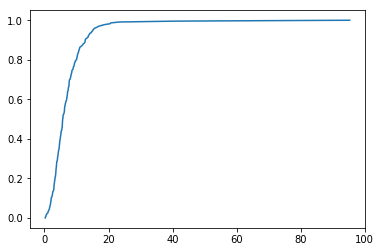

In [68]:
error_sorted= np.sort(e_stack)
p = 1. *np.arange(len(e_stack))/(len(e_stack)-1)
plt.plot(error_sorted, p)
plt.show()

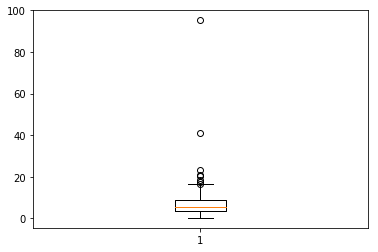

In [70]:
plt.boxplot(e_stack, sym="o", whis = 1.5)
plt.show()

In [30]:
# reshape the data to one dimension. above method don't need to reshape

blend_train11 =reshaped(blend_train1)
blend_test11 = reshaped(blend_test1)
blend_train21 =reshaped(blend_train2)
blend_test21 = reshaped(blend_test2)
blend_train31 =reshaped(blend_train3)
blend_test31 = reshaped(blend_test3)
blend_train41 =reshaped(blend_train4)
blend_test41 = reshaped(blend_test4)
blend_train51 =reshaped(blend_train5)
blend_test51 = reshaped(blend_test5)

In [31]:
blend_trainX = np.column_stack((blend_train11,blend_train21, blend_train31,blend_train41,blend_train51))
blend_testX = np.column_stack((blend_test11, blend_test21, blend_test31,blend_test41,blend_test51))

In [32]:
trainY_s = reshaped(trainY)
testY_s = reshaped(testY)

In [33]:
# stacking model 1
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(blend_trainX, trainY_s)
pred1 = lr.predict(blend_testX)
e, a = accuracy(pred1.reshape((226,2)), testY)
print(a)

8.2503328222


In [35]:
print(pred1)

[[ 103.47663688]
 [  37.47861771]
 [  82.00413568]
 [  27.40981271]
 [ 119.90302098]
 [  37.01663983]
 [ 134.87327909]
 [  29.05646716]
 [  55.67037546]
 [  15.52685932]
 [  92.60774227]
 [  49.67480668]
 [  37.85590219]
 [  18.68615024]
 [ 107.28076036]
 [  24.4511424 ]
 [  53.86225261]
 [  16.93309304]
 [  67.52831905]
 [  31.36265746]
 [  77.13317386]
 [  22.24668159]
 [  65.64913199]
 [  23.28191938]
 [  70.62993459]
 [  24.46005207]
 [  54.89730386]
 [  25.31444603]
 [ 129.01578486]
 [  37.68272022]
 [ 120.19577752]
 [  69.86745901]
 [ 133.53783118]
 [  52.2806416 ]
 [  95.39668439]
 [  33.97619493]
 [ 139.57374803]
 [  28.12332227]
 [  28.89421458]
 [  23.77531956]
 [  60.70322035]
 [  36.27920879]
 [  79.16346358]
 [  20.32584167]
 [ 108.50780537]
 [  19.51286435]
 [  92.91108788]
 [  61.42871882]
 [ 122.5088731 ]
 [  65.88268005]
 [  51.84422344]
 [  24.6755312 ]
 [  55.62580173]
 [  17.43746962]
 [  98.87552637]
 [  34.94322239]
 [  55.6342252 ]
 [  14.96473749]
 [  79.9610900

In [25]:
# stacking model 3
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=4)
neigh.fit(blend_trainX, trainY_s)
pred3 = neigh.predict(blend_testX)
e3, a3 = accuracy(pred3.reshape((226,2)), testY)
print(a3)

8.69701627213


In [56]:

for j, clf in enumerate(clfs):    
    print(j, clf)
    blend_test_j = np.zeros(shape=(5, len(testX),2))
    for i, (train_index, test_index) in enumerate(skf):
        print("Fold", i)   

        X_train = trainX[train_index]
        y_train = trainY[train_index]
        X_test = trainX[test_index]
        y_test = trainY[test_index]

    #     model1 = rr.train_model(X_train,y_train)
        model = clf(X_train,y_train)
        blend_train[j, test_index, :] =  model.predict(X_test)
        blend_test_j[:,:,i] =   model.predict(testX)
        

    blend_test[:,:,j] = blend_test_j.mean(axis=2)

0 <function train_model at 0x0000016E1020A400>
Fold 0
Train on 808 samples, validate on 203 samples
Epoch 1/100
808/808 [==============================] - 0s - loss: 4772.4495 - val_loss: 4640.5937
Epoch 2/100
808/808 [==============================] - 0s - loss: 4580.5283 - val_loss: 4301.8972
Epoch 3/100
808/808 [==============================] - 0s - loss: 4048.7716 - val_loss: 3501.5784
Epoch 4/100
808/808 [==============================] - 0s - loss: 3026.3709 - val_loss: 2262.0923
Epoch 5/100
808/808 [==============================] - 0s - loss: 1826.8906 - val_loss: 1311.9731
Epoch 6/100
808/808 [==============================] - 0s - loss: 1118.8428 - val_loss: 884.2793
Epoch 7/100
808/808 [==============================] - 0s - loss: 783.5000 - val_loss: 644.1486
Epoch 8/100
808/808 [==============================] - 0s - loss: 613.6579 - val_loss: 505.8835
Epoch 9/100
808/808 [==============================] - 0s - loss: 510.0662 - val_loss: 413.3073
Epoch 10/100
808/808 [===

808/808 [==============================] - 0s - loss: 116.0455 - val_loss: 96.9169
Epoch 69/100
808/808 [==============================] - 0s - loss: 110.3638 - val_loss: 96.5894
Epoch 70/100
808/808 [==============================] - 0s - loss: 119.3247 - val_loss: 94.0773
Epoch 71/100
808/808 [==============================] - 0s - loss: 113.0894 - val_loss: 93.1979
Epoch 72/100
808/808 [==============================] - 0s - loss: 114.1282 - val_loss: 93.8057
Epoch 73/100
808/808 [==============================] - 0s - loss: 115.5467 - val_loss: 91.9086
Epoch 74/100
808/808 [==============================] - 0s - loss: 114.4644 - val_loss: 92.6957
Epoch 75/100
808/808 [==============================] - 0s - loss: 115.7478 - val_loss: 91.9154
Epoch 76/100
808/808 [==============================] - 0s - loss: 111.0712 - val_loss: 92.5960
Epoch 77/100
808/808 [==============================] - 0s - loss: 113.1139 - val_loss: 92.5831
Epoch 78/100
808/808 [==============================]

808/808 [==============================] - 0s - loss: 157.6064 - val_loss: 122.5402
Epoch 36/100
808/808 [==============================] - 0s - loss: 151.4503 - val_loss: 117.0512
Epoch 37/100
808/808 [==============================] - 0s - loss: 143.3432 - val_loss: 116.4519
Epoch 38/100
808/808 [==============================] - 0s - loss: 145.5523 - val_loss: 115.8898
Epoch 39/100
808/808 [==============================] - 0s - loss: 152.8682 - val_loss: 114.5363
Epoch 40/100
808/808 [==============================] - 0s - loss: 152.9077 - val_loss: 111.6395
Epoch 41/100
808/808 [==============================] - 0s - loss: 144.2571 - val_loss: 112.1791
Epoch 42/100
808/808 [==============================] - 0s - loss: 142.9322 - val_loss: 110.6159
Epoch 43/100
808/808 [==============================] - 0s - loss: 141.3125 - val_loss: 110.0932
Epoch 44/100
808/808 [==============================] - 0s - loss: 135.3025 - val_loss: 109.7531
Epoch 45/100
808/808 [=====================

In [58]:
blend_train[69]

array([[ 49.99036026,   0.        ,   0.        ,   0.        ,   0.        ],
       [ 34.67944336,   0.        ,   0.        ,   0.        ,   0.        ]])

In [59]:
# stacking model 3
from sklearn.neighbors import KNeighborsRegressor
neig = KNeighborsRegressor(n_neighbors=4)
neig.fit(blend_train,trainY)
pred3 = neig.predict(blend_test)
e3, a3 = accuracy(pred3, test_y)
print(a3)

ValueError: Found array with dim 3. Estimator expected <= 2.

In [77]:
a = np.zeros((3,2,5))
print(a)
print(a[:,:,3])

[[[ 0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.]]

 [[ 0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.]]

 [[ 0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.]]]
[[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]


In [71]:

np.array([[2,0],[1,9],[3,3]])

array([[2, 0],
       [1, 9],
       [3, 3]])